In [1]:
# LOAD DATASET
import pandas as pd
df=pd.read_csv("WELFake_Dataset.csv")

In [2]:
# SHAPE, DATATYPE
print(df.shape)
print(df.dtypes)

(72134, 4)
Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object


In [3]:
# FIRST 5 ROWS
print(df.head())

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


In [4]:
# INFO
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None


In [5]:
# MISSING VALUES
print(df.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [6]:
# DROP NULL VALUES
df=df.dropna()
print(df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [7]:
print(df['label'].value_counts())

label
1    36509
0    35028
Name: count, dtype: int64


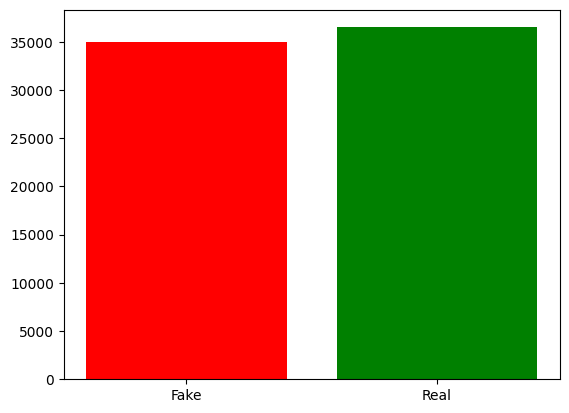

In [8]:
# BAR PLOT
import matplotlib.pyplot as plt
fake=len(df[df['label']==0])
real=len(df[df['label']==1])
labels=['Fake','Real']
values=[fake,real]
plt.bar(labels,values,color=['red','green'])
plt.show()

In [9]:
# COMMON WORDS
df['text']=df['text'].fillna('')
all_text=' '.join(df['text'].sample(1000).astype(str))
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
cleaned=re.sub(r'[^\w\s]','',all_text.lower())
words=cleaned.split()
filtered_words=[word for word in words if word not in stopwords.words('english') and len(word)>2]
common_words=Counter(filtered_words).most_common(20)
print(common_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('said', 3421), ('trump', 2651), ('would', 1491), ('people', 1349), ('one', 1267), ('president', 1251), ('new', 1003), ('also', 954), ('clinton', 900), ('like', 815), ('states', 763), ('state', 745), ('could', 733), ('obama', 722), ('government', 688), ('donald', 687), ('time', 685), ('first', 648), ('house', 636), ('even', 633)]


In [10]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import re
import nltk

def preprocess(text):
     text = text.lower()
     text = re.sub(r'[^a-zA-Z ]', '', text)
     return text

df['title']=df['title'].astype(str).fillna('')
df['text']=df['text'].astype(str).fillna('')
df['label']=df['label'].astype(int)
df['content']=df['title'] + " " + df['text']
X=df['content']
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7,min_df=5,ngram_range=(1,2))
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)
#model=RandomForestClassifier()
#model.fit(X_train,y_train)
#y_pred=model.predict(X_test)
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("classification report")
print(classification_report(y_test,y_pred))
print("accuracy score")
print(accuracy_score(y_test,y_pred))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred))

def predict_news(text):
     processed_text = preprocess(text)
     sample_vector = vectorizer.transform([processed_text])
     prediction = model.predict(sample_vector)[0]
     return "Real" if prediction == 1 else "Fake"

sample_text = "The tentative deal reached this weekend between the president campaigns of Hillary Clinton and Bernie Sanders includes a debate Thursday at the University of New Hampshire in Durham"
print("\nPrediction for sample text:", predict_news(sample_text))

(57229,)
(14308,)
(57229,)
(14308,)
classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7081
           1       0.90      0.90      0.90      7227

    accuracy                           0.90     14308
   macro avg       0.90      0.90      0.90     14308
weighted avg       0.90      0.90      0.90     14308

accuracy score
0.898658093374336
confusion matrix
[[6378  703]
 [ 747 6480]]

Prediction for sample text: Fake


In [11]:
sample_text="nasa found water on the moon"
print("\nPrediction for sample text:", predict_news(sample_text))


Prediction for sample text: Real


In [12]:
sample_text = "Austria spearheads Balkan Frontier Defence Project"
print("\nPrediction for sample text:", predict_news(sample_text))


Prediction for sample text: Fake


In [13]:
!pip install streamlit pyngrok --quiet
!ngrok config add-authtoken 30oIGF68QVfbAUOAhSBWgoC7wNx_6zBTUUHD3Vi79neiA6gCp
!wget -q -O - ipv4.icanhazip.com

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
34.145.44.24


In [15]:
#Streamlit
import streamlit as st

from pyngrok import ngrok
!pkill streamlit
st.title("Fake News")
input=st.text_area("enter the article")
if st.button("predict"):
    result=predict_news(input)
    if result=="Real":
      st.success(result)
    else:
      st.error(result)


!streamlit run app.py &> /content/log.txt &
public_url=ngrok.connect(8501)
print("streamlit",public_url)


2025-08-05 05:07:54.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 05:07:54.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

streamlit NgrokTunnel: "https://cc112f015808.ngrok-free.app" -> "http://localhost:8501"
